# MTH 9855 Homework 5

## Junliang Zhou

Tel: (347) 276-1207

Email: gjimzhou@gmail.com

In [1]:
# Package unpackged
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import itertools

### Problem 5.1

In [2]:
# Data imported
data=pd.read_csv("BetaExample.txt",sep="|")
data=data.dropna(how='any')
data.DATE=pd.to_datetime(data.DATE)

In [3]:
# Learn and test data separated
learnData=data.loc[data['DATE']<='2014-12-31']
testData=data.loc[(data['DATE']>='2015-01-01') & (data['DATE']<='2015-12-31')]

In [4]:
# Beta calculated
tickers=data['TICKER'].unique()
regs=[]

for t in tickers:
    learnTickerData=learnData.loc[learnData['TICKER']==t]
    reg=LinearRegression(fit_intercept=False)
    X=np.c_[learnTickerData['RM']]
    y=list(learnTickerData['R'])
    reg.fit(X, y)
    regs.append(reg)
    
    print(t,float(reg.coef_))

IBM 0.9067383815134795
AAPL 1.1363004700195205
TSLA 1.3100847134478366


In [5]:
# Holding solved
betas=[float(r.coef_) for r in regs]
unit=[0,1,0]
ones=[1,1,1]

M=np.array([betas,unit,ones])
b=np.array([0,1,0])
holdings=np.linalg.solve(M,b)

for t,h in zip(tickers,holdings):
    print(t,h)

IBM -0.430856139425
AAPL 1.0
TSLA -0.569143860575


In [6]:
# Returns and cumulative sum returns for portfolio and market calculated
period=testData['DATE'].unique()
returns=[]
marketReturns=[]

for p in period:
    dayData=testData.loc[testData['DATE']==p]
    dayReturns=[float(dayData.loc[dayData['TICKER']==t]['R']) for t in tickers]
    returns.append(np.dot(holdings,dayReturns))
    marketReturns.append(float(dayData.loc[dayData['TICKER']=='IBM']['RM']))
    
accReturns=list(itertools.accumulate(returns))
accMarketReturns=list(itertools.accumulate(marketReturns))

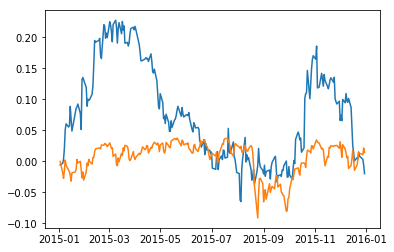

In [7]:
# Cumulative sum returns plotted
plt.plot(period,accReturns,period,accMarketReturns)
plt.show()

In [8]:
np.corrcoef(returns,marketReturns)

array([[ 1.        ,  0.02919532],
       [ 0.02919532,  1.        ]])

### Problem 5.2

In [9]:
# Variance functions defined
def f(beta,sigM2):
    return beta**2*sigM2

def g(n,sigi2):
    return 1/n*sigi2

def marketFraction(n,beta,sigM2,sigi2):
    fValue=f(beta,sigM2)
    gValue=g(n,sigi2)
    return fValue/(fValue+gValue)

In [10]:
# Parameters set
ns=list(range(2,31))
beta=0.5
sigM2=0.2**2
sigi2=0.1

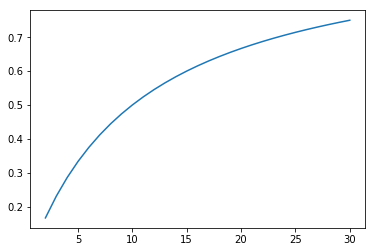

In [11]:
# fraction of variance explained by the market calculated
fractions=[marketFraction(n,beta,sigM2,sigi2) for n in ns]
plt.plot(ns,fractions)
plt.show()

In [12]:
# Sharpe ratio function defined
def expectation(n,beta,muM,mui):
    return beta*muM+mui

def variance(n,beta,sigM2,sigi2):
    fValue=f(beta,sigM2)
    gValue=g(n,sigi2)
    return fValue+gValue

def sharpeRatio(n,beta,muM,mui,sigM2,sigi2,fee):
    eValue=expectation(n,beta,muM,mui)
    vValue=variance(n,beta,sigM2,sigi2)
    return (eValue-fee)/np.sqrt(vValue)

In [13]:
# Parameters setted again
muM=0.07
sri=1.5
mui=sri*np.sqrt(sigi2)
fee=0.01

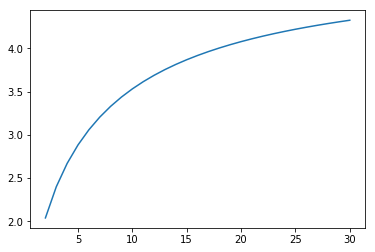

In [14]:
# Portfolio Sharpe ratio calculated
srs1=[sharpeRatio(n,beta,muM,mui,sigM2,sigi2,fee) for n in ns]
plt.plot(ns,srs1)
plt.show()

In [15]:
# Setup modified
sri=2
mui=sri*np.sqrt(sigi2)

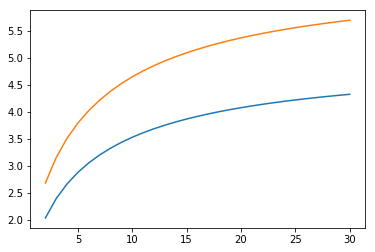

In [16]:
# Portfolio Sharpe ratio calculated
srs2=[sharpeRatio(n,beta,muM,mui,sigM2,sigi2,fee) for n in ns]
plt.plot(ns,srs1,ns,srs2)
plt.show()

In [17]:
n=1
beta=0
sigi2=0.1**2
sri=1.5
mui=sri*np.sqrt(sigi2)
fee=0.01
sharpeRatio(n,beta,muM,mui,sigM2,sigi2,fee)

1.4000000000000001